In [13]:
using LinearAlgebra
using Statistics
using Random
using Distributions

In [2]:
# Współczynniki
alpha_11 = 0.85
alpha_12 = 0.1
alpha_21 = 0.5
alpha_22 = 0.5
alpha_23 = 0.0
alpha_31 = 0.12
alpha_32 = 0.12
M_przez_S = 0.3
S_przez_M = 1 / M_przez_S
alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
alpha_33 = (1 - (alpha_31 + alpha_32*alpha_21/(1 - alpha_22))*S_przez_M);

In [3]:
# Macierz układu
A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [4]:
#Warunki początkowe
S = 5.0e6
D = 5.0e6
M = M_przez_S * D
X_0 = [D, S, M]
T = 100
# Sprawdzamy poprawność
#println("Okołopoprawne? ", A*X_0 ≈ X_0)
println("Poprawne? ", A*X_0 == X_0)

Poprawne? true


In [5]:
A

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [6]:
M

1.5e6

In [7]:
X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [8]:
A*X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [9]:
# Tablice zmiennych
Z_D = 5000
X_D_zakł = zeros(Z_D, 3, T)
D_zakł = zeros(Z_D, T);
S_zakł = zeros(Z_D, T)
M_zakł = zeros(Z_D, T)

5000×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [10]:
# Rozkład Gumbela dla zakłóceń
#==#
μ = 0.0
λ = 2.5*10^(3)
Gumbel_distr_1 = Gumbel(μ,λ)
D_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)
S_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)
M_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)

5000×99 view(::Matrix{Float64}, :, 2:100) with eltype Float64:
 -1386.95     2934.13    5666.05   …   7036.8       847.294   14958.8
 -2632.92      237.187  -1237.4       -2821.18     4263.13     -188.586
  -561.547    2441.33    5436.64      -4320.35     6587.79    -1185.74
  3188.54      787.784    337.598       439.494    1611.94     1984.27
  3137.52     4133.59   -1699.35       2349.78     1625.1      5784.02
  -224.924    4331.32    1357.88   …   -950.681   -1201.78     3053.89
  -434.693    2074.37    5164.91      -1771.46     2217.89     5774.2
  2079.14      898.155   -416.612      6191.75     1772.18     2772.34
  -780.488   -2894.75    4793.29       4044.44     6207.18     3741.64
  3993.7       122.242   2802.54      -3764.85     4464.53     2108.03
  -108.88     -757.177    985.167  …    182.546    -427.435   -1275.87
   -55.5433   2086.05    2948.24       5747.96    -2743.57    -1403.95
  2466.4      4801.13   -1930.91      -2372.86     1516.62     1192.15
     ⋮         

In [14]:
using JLD2
# @save "D_zakł.jld2" D_zakł
# @save "S_zakł.jld2" S_zakł
# @save "M_zakł.jld2" M_zakł

In [15]:
D_zakł_wczytane = load("D_zakł.jld2")
S_zakł_wczytane = load("S_zakł.jld2")
M_zakł_wczytane = load("M_zakł.jld2")

Dict{String, Any} with 1 entry:
  "M_zakł" => [0.0 16336.5 … 2710.01 4570.8; 0.0 -2185.15 … -973.645 -3671.55; …

In [16]:
typeof(D_zakł_wczytane)

Dict{String, Any}

In [17]:
typeof(D_zakł_wczytane["D_zakł"])

Matrix{Float64} (alias for Array{Float64, 2})

In [18]:
D_zakł = D_zakł_wczytane["D_zakł"]
S_zakł = S_zakł_wczytane["S_zakł"]
M_zakł = M_zakł_wczytane["M_zakł"]

5000×100 Matrix{Float64}:
 0.0  16336.5    -3744.09       540.743  …   5934.84    2710.01     4570.8
 0.0  -2185.15   -2574.37      2228.06       6138.93    -973.645   -3671.55
 0.0  -2317.98     772.495     -792.779     -1425.33    1902.56     1887.35
 0.0    598.186   1575.93      1586.47       1789.56   -2159.0     -1358.22
 0.0   -662.077   3074.37     -1863.9        1137.03    1110.46    -1667.02
 0.0   -284.096    458.304     1896.62   …    450.341   6421.12      795.579
 0.0   -299.095      3.63179  -1114.46       4489.94    2766.95     -288.582
 0.0   7299.9     -933.144    -1245.32      -1112.05     -13.9815     25.3016
 0.0   1692.67     361.846     5970.59       3793.77    -497.858    4133.59
 0.0   -632.465  -1842.36     -2000.7        4763.46    -106.115     828.02
 0.0   4001.09   -1446.13      2776.3    …  -1264.56     818.32    -1238.43
 0.0    674.129  -1633.92      4964.86       1669.12   -2432.61    -1457.44
 0.0  -4801.78     745.025     5302.98       1882.42    461

In [19]:
Wektory_D_zakł = zeros(Z_D, 3, T)
Wektory_D_zakł[:, 1, :] .= D_zakł
Wektory_D_zakł[:, 2, :] .= S_zakł
Wektory_D_zakł[:, 3, :] .= M_zakł

5000×100 view(::Array{Float64, 3}, :, 3, :) with eltype Float64:
 0.0  16336.5    -3744.09       540.743  …   5934.84    2710.01     4570.8
 0.0  -2185.15   -2574.37      2228.06       6138.93    -973.645   -3671.55
 0.0  -2317.98     772.495     -792.779     -1425.33    1902.56     1887.35
 0.0    598.186   1575.93      1586.47       1789.56   -2159.0     -1358.22
 0.0   -662.077   3074.37     -1863.9        1137.03    1110.46    -1667.02
 0.0   -284.096    458.304     1896.62   …    450.341   6421.12      795.579
 0.0   -299.095      3.63179  -1114.46       4489.94    2766.95     -288.582
 0.0   7299.9     -933.144    -1245.32      -1112.05     -13.9815     25.3016
 0.0   1692.67     361.846     5970.59       3793.77    -497.858    4133.59
 0.0   -632.465  -1842.36     -2000.7        4763.46    -106.115     828.02
 0.0   4001.09   -1446.13      2776.3    …  -1264.56     818.32    -1238.43
 0.0    674.129  -1633.92      4964.86       1669.12   -2432.61    -1457.44
 0.0  -4801.78     7

In [22]:
size(Wektory_D_zakł)

(5000, 3, 100)

In [20]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
for i in range(1,Z_D)
    X_D_zakł[i, :, 1] .= X_0
end

### Przykładowo symulacja

In [26]:
# print(size(X_D_zakł))

X_D_zakł[1, :, :]

(5000, 3, 100)

3×100 Matrix{Float64}:
 5.0e6  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 5.0e6  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.5e6  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

### 1 Wpływ losowych zaklóceń popytu na układ i jego ewolucji w trakcie 100 okresów, ...

In [31]:
#W każdym okresie dajemy zmienną losową do WSZYSTKICH RÓWNAŃ:
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
        X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
    end
end

In [32]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
    UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
    CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
    CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
    UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
    CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
    CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
    UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
    CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
    CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  2.4205e6  3.05495e6  3.6476e6  …  4.89103e7  4.93865e7  4.98401e7

In [33]:
using Plots

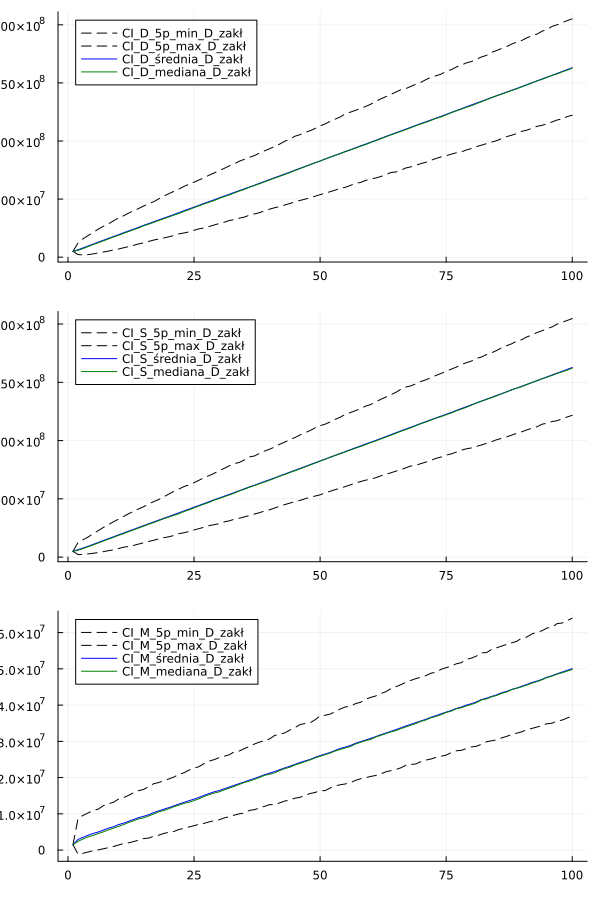

"c:\\Users\\rados\\OneDrive - SGH\\Semestr 8\\ZMS\\projekty_ZMS\\raport_1\\plot2.svg"

In [34]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot2.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!


In [164]:
CI_M_mediana_D_zakł

100-element Vector{Float64}:
 1.5e6
 2.49325004930998e6
 3.141597363327739e6
 3.6428239486594675e6
 4.139144340433373e6
 4.700721462163689e6
 5.049172812714452e6
 5.448895919558357e6
 6.136513806094366e6
 6.582074204658227e6
 ⋮
 4.626946877508472e7
 4.664106171501416e7
 4.7213470074950665e7
 4.7718668398148075e7
 4.8122628611579396e7
 4.864175241378561e7
 4.927239290232421e7
 4.9738835160673566e7
 5.018578699826493e7

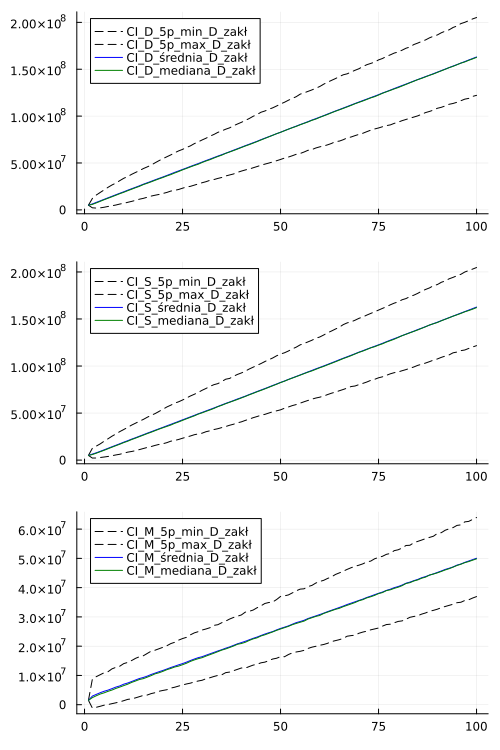

In [35]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (500, 750),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
#savefig(p, "plot_rzd2.svg")

### 2) Wpływ losowych zakłóceń popytu na układ i jego ewolucji w trakcie 100 okresów, przy założeniu, że jedynym okresem z zakłóceniami jest t = 1

In [37]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
        if t==2
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
        else
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] 
        end

    end
end

In [38]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
    UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
    CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
    CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
    UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
    CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
    CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
    UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
    CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
    CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  2.4205e6  2.0396e6  1.89887e6  …  1.85447e6  1.85447e6  1.85447e6

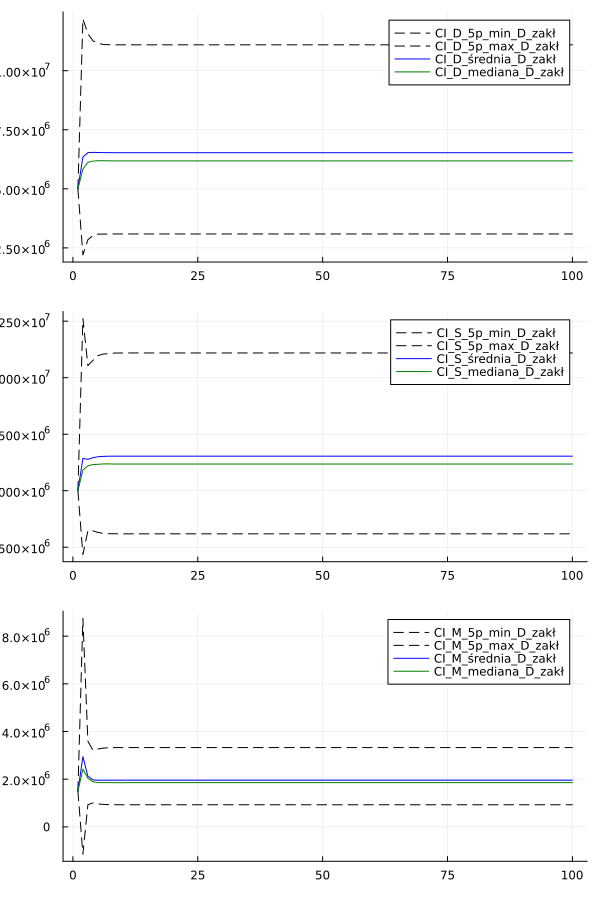

"c:\\Users\\rados\\OneDrive - SGH\\Semestr 8\\ZMS\\projekty_ZMS\\raport_1\\plot2.svg"

In [39]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot2.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!